In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
file = '../../../../../../dataframes/enigh/HOGARES/df_one_hot.csv'


In [3]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

anio_tvd,anio_licua,anio_refri,anio_estuf,anio_lavad,anio_planc,tsalud1_h,tsalud1_m,est_alim,est_trans,⋯,alim17_12_1,alim17_12_2,alim17_12_3,alim17_12_4,alim17_12_5,alim17_12_6,alim17_12_7,acc_alim18_1,acc_alim18_2,acc_alim18_3
0.1530612,0.1010101,0.06060606,0.07070707,0.09090909,0.1414141,0,0.5084746,0.06000000,0.141129032,⋯,0,0,0,0,0,0,1,1,0,0
0.1326531,0.1111111,0.11111111,0.06060606,0.06060606,0.1111111,0,0.5084746,0.02571429,0.004032258,⋯,0,0,0,0,0,0,1,1,0,0
0.1530612,0.1414141,0.12121212,0.12121212,0.14141414,0.1414141,0,0.3389831,0.04857143,0.070564516,⋯,0,0,0,0,0,0,1,1,0,0
0.1530612,0.1212121,0.10101010,0.10101010,0.13131313,0.1515152,0,0.5084746,0.03428571,0.060483871,⋯,0,0,0,0,0,0,1,1,0,0
0.1326531,0.1414141,0.12121212,0.15151515,0.15151515,0.1313131,0,0.2542373,0.08857143,0.060483871,⋯,0,0,0,0,0,0,1,1,0,0
0.1428571,0.1313131,0.96969697,0.06060606,0.01010101,0.1111111,0,0.3389831,0.09428571,0.483870968,⋯,0,0,0,0,0,0,1,1,0,0


In [4]:
ncol(data)

[1] 272

In [5]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [6]:
max(dunn_kmeans)

[1] 0.3888339

Saving 7 x 7 in image


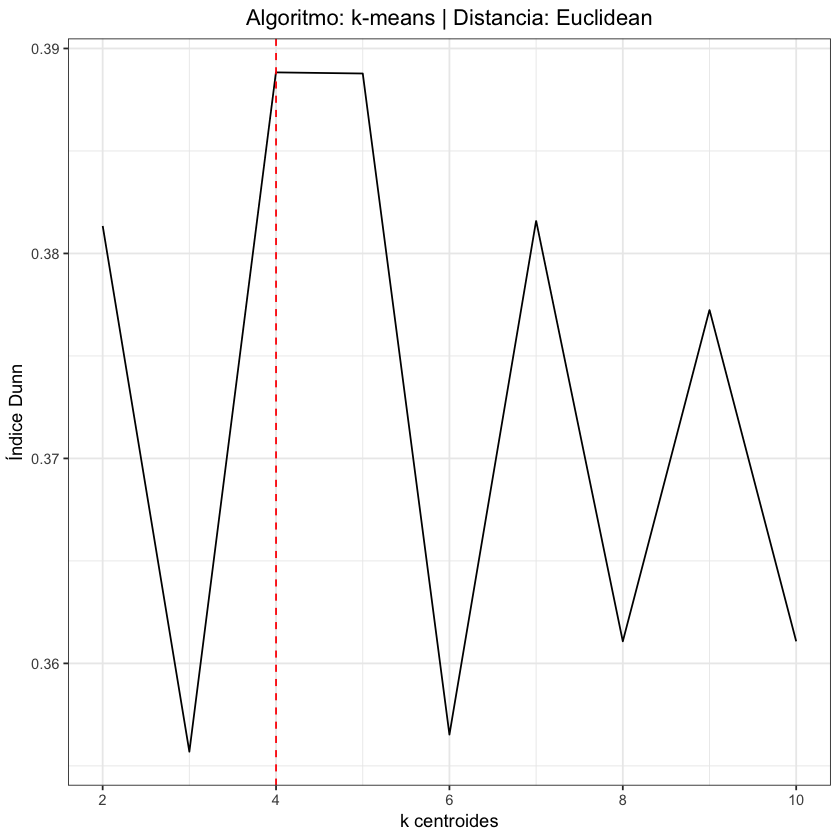

In [7]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-means | Distancia: Euclidean', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/HOGARES/dunn_euclidean_encoding.png", dpi = 300)
    

In [8]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

Saving 7 x 7 in image


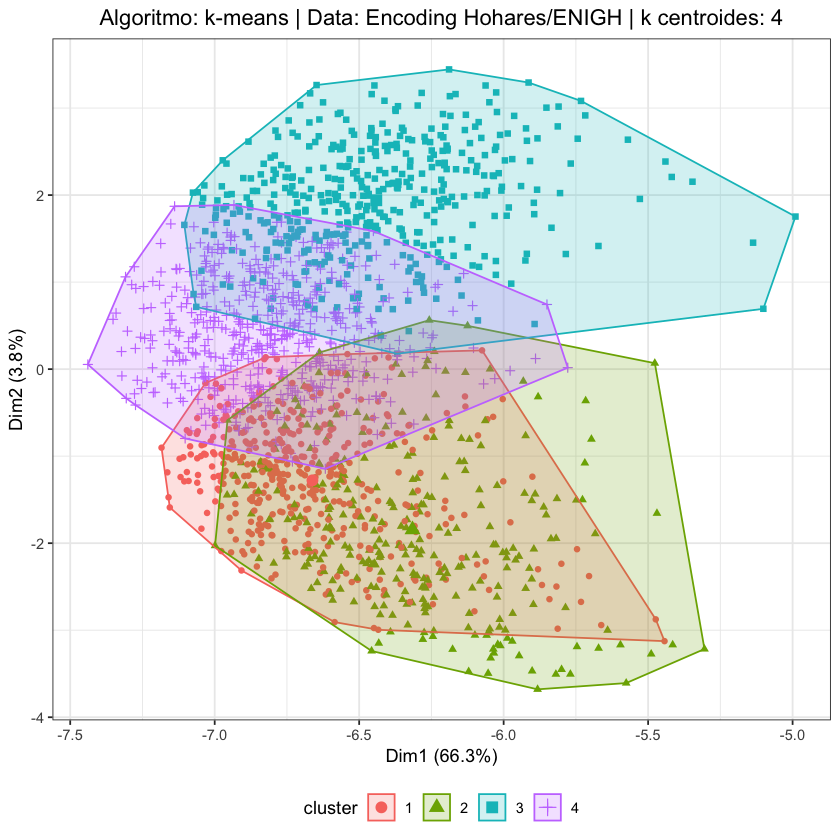

In [14]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-means | Data: Encoding Hohares/ENIGH | k centroides:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/HOGARES/kmeans_euclidean_one_hot.png", 
       dpi = 300)

In [11]:
file = '../../../../../../dataframes/enigh/HOGARES/df_encoding_cluster.csv'


In [12]:
write.csv(kmeans$cluster, 
          file = file,
          row.names=F)
